In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.calibration import CalibratedClassifierCV

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,2,1,5,1,0,0,0,1,0,...,10,0,3,5,0,1,0,0,0,0
1,1,1,1,4,0,0,1,0,0,0,...,6,2,3,9,0,1,0,1,0,1
2,1,2,1,1,1,0,1,0,0,0,...,7,0,2,10,1,1,0,0,0,1
3,1,3,2,1,0,0,0,0,1,0,...,7,1,7,6,0,0,0,0,0,0
4,1,5,1,3,1,0,0,1,0,0,...,5,0,3,11,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,1,3,0,0,1,0,0,0,...,7,1,4,10,0,0,1,0,0,0
19996,0,0,1,6,1,0,0,0,1,0,...,8,2,4,5,1,1,1,0,0,0
19997,0,5,1,0,1,-1,0,1,0,0,...,6,0,2,7,1,0,1,0,0,0
19998,0,2,1,8,0,0,0,0,0,1,...,2,1,1,14,0,0,1,0,1,0


Let's standardize dataset

In [4]:
scaler = StandardScaler()

scaler.fit(df.values)

df_standardized = pd.DataFrame(scaler.fit_transform(df.drop(['target'], axis=1)))
y = df['target']

Split our standardized dataset to train and test dataframes

In [5]:
x_train, x_test, y_train, y_test = tts(df_standardized, y, test_size=0.3)  # Cut off 30% of the sample for test

Fit and train the model

In [6]:
clf = LogisticRegression()

model = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

pred_test_clf = clf.predict_proba(x_test)[:,1]
score1 = roc_auc_score(y_test, pred_test_clf)
score1

0.620833881482456

In [7]:
score2 = average_precision_score(y_test, pred_test_clf)
score2

0.6032820400006483

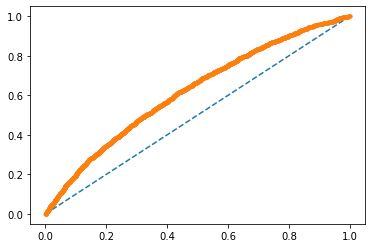

In [8]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_clf)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

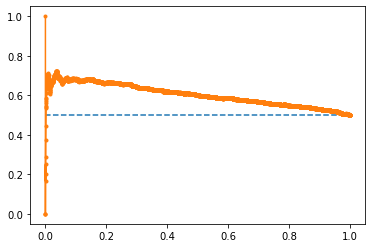

In [9]:
yhat = model.predict(x_test)

precision, recall, thresholds = precision_recall_curve(y_test, pred_test_clf)
f1 = f1_score(y_test, yhat)

pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
pyplot.plot(recall, precision, marker='.')
pyplot.show()